In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.linear_model import LinearRegression

In [4]:
df = pd.read_csv('https://storage.googleapis.com/kaggle-competitions-data/kaggle/10370/train.csv?GoogleAccessId=web-data@kaggle-161607.iam.gserviceaccount.com&Expires=1535047611&Signature=Tee6kU8ZAz0LfC0hz4rVzFxRZZSYT67P2wvFX4DSQdMuUyqzrjUFfeWdPPd6p6P%2FfVhYw13lChsRP8tLqnrCb8Tdvmzl9ina6qXcj12Cv4Rpz3tzaZuPAeuYsrXBXhqJqFSk8Iuw7EoFbdqNxb4RadywmPkBjyAuKsHhP5yFol%2B3LG%2FJBTYMP4ZaTVo1ZlGYtneVGeL7gOt5moDWTM9eUDklShr94ARqC8fNnnaX%2Fmd1b1Rnl7oIasn%2BnikpTJh8cswxwmUcN289pmIL3L3Q5carUZBzNHdGkeZ%2BRdREKPNk4%2BikbsFGDyKxBvTeLuHFYW6CUCUToCOhYnkLfSHyvw%3D%3D')

In [6]:
df.head()

,Id,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,...,Screen Porch,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,SalePrice
0,109,533352170,60,RL,NaN,13517,Pave,NaN,IR1,Lvl,...,0,0,NaN,NaN,NaN,0,3,2010,WD,130500
1,544,531379050,60,RL,43.0,11492,Pave,NaN,IR1,Lvl,...,0,0,NaN,NaN,NaN,0,4,2009,WD,220000
2,153,535304180,20,RL,68.0,7922,Pave,NaN,Reg,Lvl,...,0,0,NaN,NaN,NaN,0,1,2010,WD,109000
3,318,916386060,60,RL,73.0,9802,Pave,NaN,Reg,Lvl,...,0,0,NaN,NaN,NaN,0,4,2010,WD,174000
4,255,906425045,50,RL,82.0,14235,Pave,NaN,IR1,Lvl,...,0,0,NaN,NaN,NaN,0,3,2010,WD,138500


In [21]:
df_n = df[['Overall Cond','Overall Qual', 'Id', 'SalePrice']]

In [22]:
df_n.isnull().sum()

Overall Cond    0
Overall Qual    0
Id              0
SalePrice       0
dtype: int64

In [ ]:
df.describe()

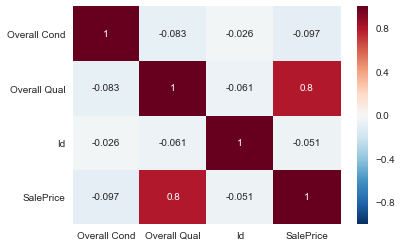

In [23]:
sns.heatmap(df_n.corr(), annot = True)

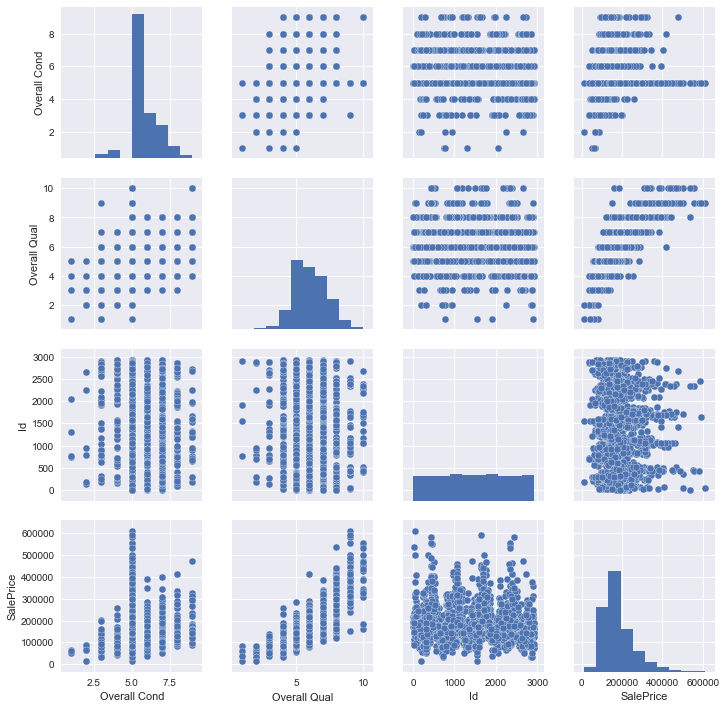

In [25]:
sns.pairplot(df_n)

In [ ]:
df.shape

In [ ]:
#df1 = df[['SalePrice','Alley']]

In [ ]:
#df1.dropna(inplace = True)

In [ ]:
#dum = pd.get_dummies(df1['Alley'], drop_first = True)

In [26]:
model = LinearRegression()

In [27]:
from sklearn.model_selection import train_test_split, KFold, cross_val_score
from sklearn.metrics import r2_score

In [31]:
features = df_n[['Overall Cond','Overall Qual']]
features

,Overall Cond,Overall Qual
0,8,6
1,5,7
2,7,5
3,5,5
4,8,6
5,6,6
6,5,6
7,5,5
8,5,5
9,5,5


In [34]:
X = df_n[['Overall Cond','Overall Qual']]
y = df_n['SalePrice']

In [35]:
X_train, X_test, y_train, y_test = train_test_split(X,y)
lr = LinearRegression()

In [36]:
fold = KFold(n_splits=5, shuffle=True)
scores = cross_val_score(lr, X_train, y_train, cv=fold)
scores.mean()

0.6478489720794404

In [37]:
lr.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [38]:
lr.score(X_train, y_train)

0.6475677245227776

In [39]:
lr.predict(X_test)

array([131622.68200734, 129648.60487485, 131622.68200734, 129648.60487485,
       171325.86179089, 175274.01605587, 129648.60487485, 268498.91555039,
       222873.50436937, 268498.91555039, 214977.19583942, 177248.09318835,
       359749.73791242, 125700.45060988,  42345.93677779, 266524.8384179 ,
        38397.78251282, 171325.86179089, 131622.68200734,  84023.19369384,
       131622.68200734, 177248.09318835, 173299.93892338, 314124.3267314 ,
       129648.60487485, 125700.45060988, 222873.50436937, 177248.09318835,
       173299.93892338, 175274.01605587,  40371.85964531, 173299.93892338,
        82049.11656135, 268498.91555039, 268498.91555039, 133596.75913983,
       268498.91555039, 268498.91555039, 268498.91555039, 127674.52774236,
       177248.09318835, 268498.91555039, 222873.50436937, 129648.60487485,
       314124.3267314 , 129648.60487485, 177248.09318835, 222873.50436937,
       222873.50436937,  82049.11656135, 127674.52774236, 129648.60487485,
       314124.3267314 , 1

In [40]:
test_kaggle = pd.read_csv('https://storage.googleapis.com/kaggle-competitions-data/kaggle/10370/test.csv?GoogleAccessId=web-data@kaggle-161607.iam.gserviceaccount.com&Expires=1535054787&Signature=pOjtRqomtGsSeRqFNBj26jelnJ1ZSghVUY95xXEQHRYHeUxyd1YZjyG02fQx5H0ZgDi4Rp9m%2FMRKlJr6fNBXiuHZq57%2FWgfwXPT002pCWt%2BLa7cdOaA0pTChSXexY2w93viAoAkHHZi3gLSD3M7YGu71ONN8hJPA2qP60oeUD7PNRFAzOjzYFat%2F7nRF%2FtRQrOFLAT9pn04AAiWrjwGiwx10ZfnnF%2BVStaIYVDTU5%2FsMTPS9y3WyDftCfPNwV7UyGEaPyVa5nEefbu7hnMSUQOOEMTwiFCSPByRnN8fNT5WZB3B%2F1l82FOBhZaXa9qq%2FRPYkXNyWNVbQ7spSeEyMmw%3D%3D')

In [41]:
test_kaggle.head()

,Id,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,...,3Ssn Porch,Screen Porch,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type
0,2658,902301120,190,RM,69.0,9142,Pave,Grvl,Reg,Lvl,...,0,0,0,NaN,NaN,NaN,0,4,2006,WD
1,2718,905108090,90,RL,NaN,9662,Pave,NaN,IR1,Lvl,...,0,0,0,NaN,NaN,NaN,0,8,2006,WD
2,2414,528218130,60,RL,58.0,17104,Pave,NaN,IR1,Lvl,...,0,0,0,NaN,NaN,NaN,0,9,2006,New
3,1989,902207150,30,RM,60.0,8520,Pave,NaN,Reg,Lvl,...,0,0,0,NaN,NaN,NaN,0,7,2007,WD
4,625,535105100,20,RL,NaN,9500,Pave,NaN,IR1,Lvl,...,0,185,0,NaN,NaN,NaN,0,7,2009,WD


In [42]:
test_kaggle.isna().sum()

Id                  0
PID                 0
MS SubClass         0
MS Zoning           0
Lot Frontage      160
Lot Area            0
Street              0
Alley             821
Lot Shape           0
Land Contour        0
Utilities           0
Lot Config          0
Land Slope          0
Neighborhood        0
Condition 1         0
Condition 2         0
Bldg Type           0
House Style         0
Overall Qual        0
Overall Cond        0
Year Built          0
Year Remod/Add      0
Roof Style          0
Roof Matl           0
Exterior 1st        0
Exterior 2nd        0
Mas Vnr Type        1
Mas Vnr Area        1
Exter Qual          0
Exter Cond          0
                 ... 
Full Bath           0
Half Bath           0
Bedroom AbvGr       0
Kitchen AbvGr       0
Kitchen Qual        0
TotRms AbvGrd       0
Functional          0
Fireplaces          0
Fireplace Qu      422
Garage Type        44
Garage Yr Blt      45
Garage Finish      45
Garage Cars         0
Garage Area         0
Garage Qua

In [43]:
test_kaggle['Lot Frontage'].mean()

69.63004172461753

In [60]:
ktest = test_kaggle[['Overall Cond','Overall Qual', 'Id']]

In [61]:
ktest.dtypes

Overall Cond    int64
Overall Qual    int64
Id              int64
dtype: object

In [95]:
#b = k[['Lot Frontage', 'Lot Area', 'Year Built', 'Year Remod/Add']]

In [96]:
ktest_1 = test_kaggle[['Overall Cond','Overall Qual']]

In [97]:
ktest_1

,Overall Cond,Overall Qual
0,8,6
1,4,5
2,5,7
3,6,5
4,5,6
5,6,4
6,6,4
7,7,5
8,5,7
9,6,6


In [98]:
SalePrice = lr.predict(ktest_1)
SalePrice.round(4)


array([171325.8618, 133596.7591, 222873.5044, 129648.6049, 177248.0932,
        84023.1937,  84023.1937, 127674.5277, 222873.5044, 175274.0161,
       177248.0932, 173299.9389, 177248.0932, 222873.5044, 173299.9389,
       129648.6049, 175274.0161, 131622.682 , 175274.0161, 260602.607 ,
       125700.4506, 129648.6049, 177248.0932, 177248.0932, 220899.4272,
       127674.5277,  87971.348 , 129648.6049, 173299.9389,  40371.8596,
        84023.1937,  85997.2708, 218925.3501, 129648.6049, 222873.5044,
       222873.5044,  84023.1937,  82049.1166, 127674.5277, 222873.5044,
       177248.0932, 222873.5044, 129648.6049, 127674.5277, 220899.4272,
        84023.1937, 222873.5044, 131622.682 , 127674.5277, 131622.682 ,
       131622.682 , 260602.607 , 268498.9156, 129648.6049, 131622.682 ,
       171325.8618, 220899.4272, 131622.682 , 222873.5044, 222873.5044,
       268498.9156, 133596.7591, 129648.6049, 220899.4272, 177248.0932,
       268498.9156,  87971.348 , 177248.0932,  38397.7825, 17724

In [99]:
ktest_1['SalePrice'] = SalePrice

/anaconda3/envs/dsi/lib/python3.6/site-packages/ipykernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


In [100]:
ktest_1['Id'] = ktest['Id']

/anaconda3/envs/dsi/lib/python3.6/site-packages/ipykernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


In [101]:
ktest_1

,Overall Cond,Overall Qual,SalePrice,Id
0,8,6,171325.861791,2658
1,4,5,133596.759140,2718
2,5,7,222873.504369,2414
3,6,5,129648.604875,1989
4,5,6,177248.093188,625
5,6,4,84023.193694,333
6,6,4,84023.193694,1327
7,7,5,127674.527742,858
8,5,7,222873.504369,95
9,6,6,175274.016056,1568


In [102]:
kaggle_submit = ktest_1[['Id', 'SalePrice']]

In [103]:
kaggle_submit.to_csv('Sub3.csv', sep=',', index=False)

In [104]:
import os
os.getcwd()

'/Users/Jack/Documents/DSI-Assignments/project-2'

In [105]:
kaggle_submit.shape

(879, 2)

In [106]:
kaggle_submit

,Id,SalePrice
0,2658,171325.861791
1,2718,133596.759140
2,2414,222873.504369
3,1989,129648.604875
4,625,177248.093188
5,333,84023.193694
6,1327,84023.193694
7,858,127674.527742
8,95,222873.504369
9,1568,175274.016056
